In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv("Salary_Data.csv")

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Rename the columns

In [8]:
data=data.rename({'YearsExperience' : 'YRS_E'},axis=1)

In [9]:
data=data.rename({'Salary' : 'SLRY'},axis=1)

In [10]:
data

,YRS_E,SLRY
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Correlation

In [11]:
data.corr()

,YRS_E,SLRY
YRS_E,1.000000,0.978242
SLRY,0.978242,1.000000


# Data Visualization

In [12]:
import seaborn as sns

C:\Users\vinod kumar N\AppData\Local\Temp\ipykernel_18360\2401492414.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['YRS_E'])


<Axes: xlabel='YRS_E', ylabel='Density'>

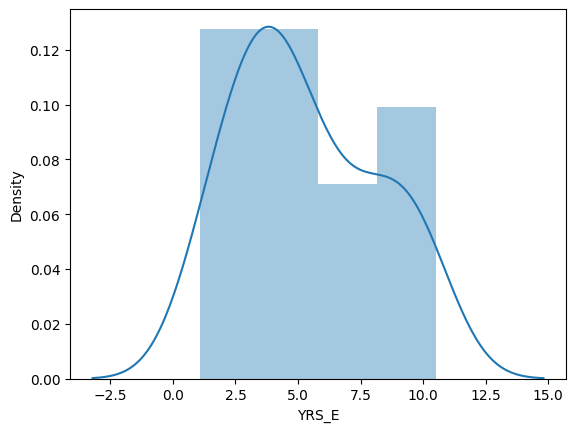

In [13]:
sns.distplot(data['YRS_E'])

C:\Users\vinod kumar N\AppData\Local\Temp\ipykernel_18360\3715989636.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SLRY'])


<Axes: xlabel='SLRY', ylabel='Density'>

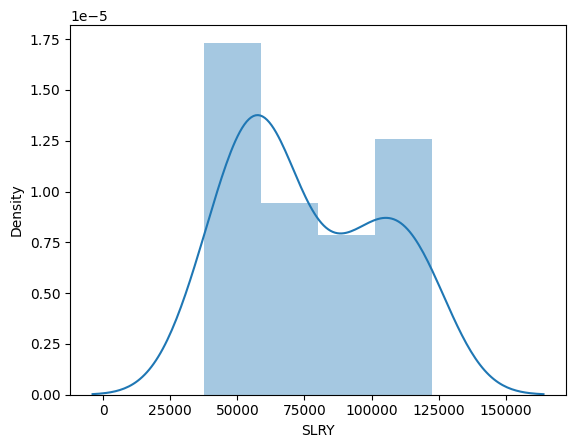

In [14]:
sns.distplot(data['SLRY'])

In [15]:
import matplotlib.pyplot as plt

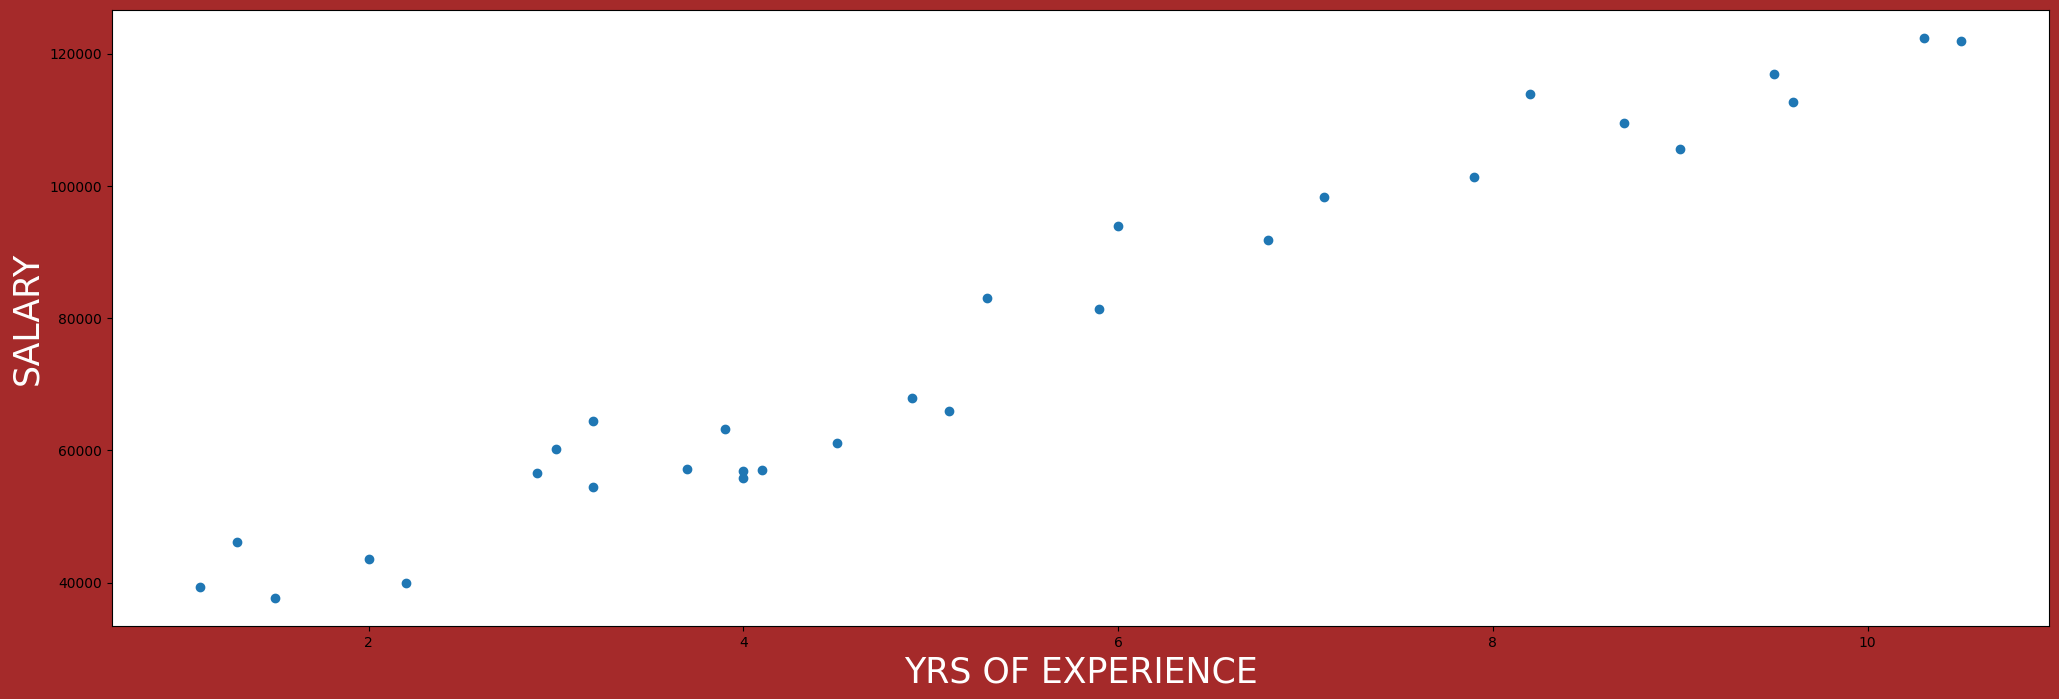

In [16]:
plt.figure(figsize=(25,8),facecolor="brown")
plt.scatter(data.YRS_E,data.SLRY)
plt.xlabel("YRS OF EXPERIENCE",color="white",size=25)
plt.ylabel("SALARY",color="white",size=25)
plt.show()

# STAT MODEL 1

In [17]:
import statsmodels.formula.api as smf

In [18]:
model1=smf.ols("SLRY~YRS_E" , data=data).fit()

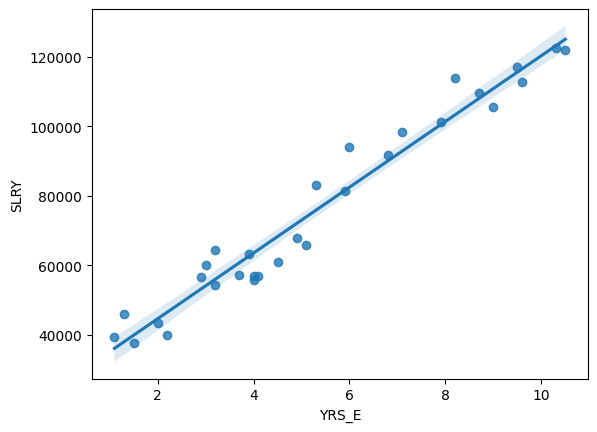

In [19]:
sns.regplot(x="YRS_E" , y="SLRY" ,data=data);

In [20]:
predicted1=model1.predict()

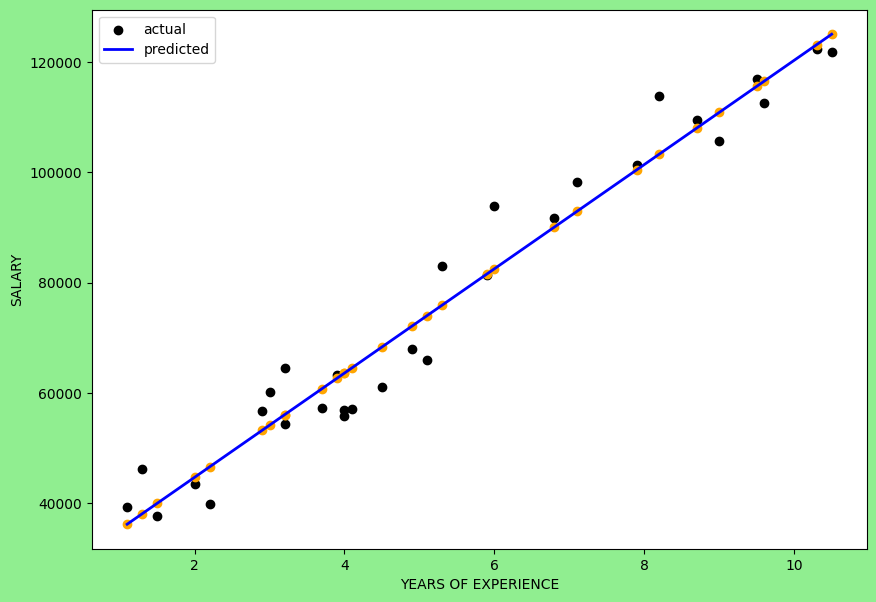

In [21]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data.YRS_E,data.SLRY,color="black",label="actual")
plt.plot(data.YRS_E,predicted1,label="predicted",color="blue",linewidth=2)
plt.scatter(data.YRS_E,predicted1,color="orange")
plt.xlabel("YEARS OF EXPERIENCE")
plt.ylabel("SALARY")
plt.legend(loc="best")
plt.show()

In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SLRY   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.14e-20
Time:                        12:31:27   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YRS_E       9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# STAT MODEL 2

In [23]:
model2=smf.ols("SLRY~np.log(YRS_E)" , data=data).fit()

In [24]:
predicted2=model2.predict()

In [25]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   SLRY   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           3.25e-13
Time:                        12:33:10   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YRS_E)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# STAT MODEL 3

In [26]:
model3=smf.ols("np.log(SLRY)~YRS_E" , data=data).fit()

In [27]:
predicted3=np.exp(model3.predict())

In [28]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(SLRY)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           7.03e-18
Time:                        12:34:44   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
YRS_E          0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# STAT MODEL 4

In [29]:
YRSE_SQR=(data.YRS_E**2)

In [30]:
model4=smf.ols("np.log(SLRY)~YRS_E+YRSE_SQR" , data=data).fit()

In [31]:
predicted4=np.exp(model4.predict())

In [32]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(SLRY)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           3.95e-18
Time:                        12:35:49   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3369      0.067    154.368      0.000      10.199      10.474
YRS_E          0.2024      0.027      7.601      0.000       0.148       0.257
YRSE_SQR      -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predict salary using yrs of experience

In [33]:
data_pred= pd.DataFrame(data,columns=['YRS_E'])

In [35]:
pred_data=model1.predict(data_pred)
pred_data

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [37]:
data['PRED SALRY']=pred_data

In [38]:
data

,YRS_E,SLRY,PRED SALRY
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
